# PROJECT 2

Submitted To: `Dr. Hasan Sajid`                                              
Submitted By: `Usman Zaheer`, Roll No: `13194`, Registration Number: `00000327700` 
RIME: `2020`  Subject: `Machine Learning`


### Problem Statement
#### Write a complete code to train a 2-layer(hidden) Neural Network for predicting corona cases in USA and world with regularization.
-  In this model, neural network model composed 2 hidden layer  is implemented with regularization for predicting corona cases in World different countries.

### Neural Network Model for Predicting Corona Cases in World

### Step 1:  Importing necesaary libraries for the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### Useful links from where data was taken and cleaned for this specific model.

For corona cases data:
- 1) https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

For weather temperarure data:
- 2) https://www.timeanddate.com/weather/

Population density: 
- 3) https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

Human Development Index:
- 4)https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

### Step 2: Importing csv file of World Data using pandas

In [2]:
df=pd.read_csv('Worldwide final.csv')

Imported Data named `df`

In [3]:
df.head()

,CONTINENT,LOCATION,DATE,COUNTRY_SERIES,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,CASES
0,Asia,Afghanistan,1/23/2020,0,0,0,54.42,0.498,7.0,0
1,Asia,Afghanistan,1/24/2020,1,1,0,54.42,0.498,7.0,0
2,Asia,Afghanistan,1/25/2020,2,2,0,54.42,0.498,13.0,0
3,Asia,Afghanistan,1/26/2020,3,3,0,54.42,0.498,2.0,0
4,Asia,Afghanistan,1/27/2020,4,4,0,54.42,0.498,6.0,0


### Step 3: Cleaning Data frame 

##### Checking Nan values in data

In [4]:
df.isna().sum()

CONTINENT                     0
LOCATION                      0
DATE                          0
COUNTRY_SERIES                0
DATE_CODE                     0
COUNTRY_CODE                  0
POPULATION DENSITY         1280
HUMAN_DEVELOPMENT_INDEX    1920
TEMPERATURES                  0
CASES                         0
dtype: int64

In [5]:
df["POPULATION DENSITY"]=df["POPULATION DENSITY"].fillna(df["POPULATION DENSITY"].mean())

In [6]:
df["HUMAN_DEVELOPMENT_INDEX"]=df["HUMAN_DEVELOPMENT_INDEX"].fillna(df["HUMAN_DEVELOPMENT_INDEX"].mean())

In [7]:
df.isna().sum()

CONTINENT                  0
LOCATION                   0
DATE                       0
COUNTRY_SERIES             0
DATE_CODE                  0
COUNTRY_CODE               0
POPULATION DENSITY         0
HUMAN_DEVELOPMENT_INDEX    0
TEMPERATURES               0
CASES                      0
dtype: int64

### Step 4: Creating features `x` and prediction label `y` 

In [8]:
x=df.drop(["CONTINENT","LOCATION","DATE","COUNTRY_SERIES","CASES"],axis=1)

`x` is our features.

In [9]:
x.head()

,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES
0,0,0,54.42,0.498,7.0
1,1,0,54.42,0.498,7.0
2,2,0,54.42,0.498,13.0
3,3,0,54.42,0.498,2.0
4,4,0,54.42,0.498,6.0


Features information:

  Here, We have 5 features:

    *1) DATE_CODE = In this model "date" is numerically coded. For example: 
        Model date starts from 23 January 2020 and ends at 7th December 2020.
        *Here: 23/01/2020 is 0 and 7th December is 319.
    *2) COUNTRY_CODE: Country codes are also numerically coded. For example:
         *Here: 1 = Afghanistan, 2= Albania and 170=Zimbabwe.
    *3) HUMAN_DEVELOPMENT_INDEX: Average Human development index of particular state  
    *4) POPULATION_DENSITY: Population Density of particular country. 
    *5) TEMPERATURES: Tempearures in C of particular country at particular date.  

In [10]:
y=df["CASES"]

`y` is our prediction label.

In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: CASES, dtype: int64

### Step 5: Normalization/ Scaling of features

In [12]:
for j in range(0, len(x.columns)):
    x=(x-x.min())/(x.max()-x.min())

In [13]:
x.head()

,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES
0,0.000000,0.0,0.002711,0.240401,0.338235
1,0.003135,0.0,0.002711,0.240401,0.338235
2,0.006270,0.0,0.002711,0.240401,0.426471
3,0.009404,0.0,0.002711,0.240401,0.264706
4,0.012539,0.0,0.002711,0.240401,0.323529


### Step 6: Splitting dataframe into training(60%) validation(20%) and testing data (20%) 

In [14]:
train_split=round(0.6*len(df))
valid_split=round(train_split + 0.2*len(df))

x_train,y_train= x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split], y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]


In [15]:
x_train.shape, x_valid.shape,x_test.shape,y_train.shape,y_valid.shape,y_test.shape

((32832, 5), (10944, 5), (10944, 5), (32832,), (10944,), (10944,))

### Step 7: Changing the shape of data sets for the model as per the code requirement.

In [16]:
x_train=x_train.T
y_train=y_train.values.reshape(1,x_train.shape[1])
x_valid=x_valid.T
y_valid=y_valid.values.reshape(1,x_valid.shape[1])
x_test=x_test.T
y_test=y_test.values.reshape(1,x_test.shape[1])

In [17]:
x_train.shape, x_valid.shape,x_test.shape,y_train.shape,y_valid.shape,y_test.shape

((5, 32832), (5, 10944), (5, 10944), (1, 32832), (1, 10944), (1, 10944))

### Step 8: Defining the architecture of Neural Network

    x -- input dataset of shape (input size, number of examples)
    ny -- labels of shape (output size, number of examples)
    n_x -- the size of the input layer
    n_h1 -- the size of the first hidden layer
    n_h2 -- the size of the second hidden layer
    n_y -- the size of the output layer

Our model architecture will be:
    - 1) Input Layer (5 Neurons)
    
    - 2) Hidden layer 1 (10 Neurons)
    
    - 3) Hidden Layer 2 (10 Neurons)
    
    - 4) Output Layer (1 Neuron)

In [18]:
def layer_sizes(x, y):
    ### START CODE HERE ### (≈ 4 lines of code)
    n_x = x.shape[0] # size of input layer
    n_h1 = 10
    n_h2 = 10
    n_y = y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h1, n_h2, n_y)

#### Step 8.1: Checking size of differnt layers of model

In [19]:
(n_x, n_h1,n_h2, n_y) = layer_sizes(x_train, y_train)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h1 = " + str(n_h1))
print("The size of the hidden layer is: n_h2 = " + str(n_h2))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h1 = 10
The size of the hidden layer is: n_h2 = 10
The size of the output layer is: n_y = 1


### Step 9: Initializing the parameters of Neural Network model

    n_x -- size of the input layer
    n_h1 -- size of the hidden layer 1
    n_h2 -- size of the hidden layer 2
    n_y -- size of the output layer
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h1, n_x)
                    b1 -- bias vector of shape (n_h1, 1)
                    W2 -- weight matrix of shape (n_h2, n_h1)
                    b2 -- bias vector of shape (n_h2, 1)
                    W3 -- weight matrix of shape (n_y, n_h2)
                    b3 -- bias vector of shape (n_y, 1)

In [20]:
def initialize_parameters(n_x, n_h1,n_h2, n_y):
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    W1 = np.random.randn(n_h1,n_x)*0.01
    b1 = np.zeros((n_h1,1))
    W2 = np.random.randn(n_h2,n_h1)*0.01
    b2 = np.zeros((n_h2,1))
    W3 = np.random.randn(n_y,n_h2)*0.01
    b3 = np.zeros((n_y,1))
    assert (W1.shape == (n_h1, n_x))
    assert (b1.shape == (n_h1, 1))
    assert (W2.shape == (n_h2, n_h1))
    assert (b2.shape == (n_h2, 1))
    assert (W3.shape == (n_y, n_h2))
    assert (b3.shape == (n_y, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    return parameters

#### Step 9.1: Checking the initialization of model parameters as per the layer size

In [21]:
parameters = initialize_parameters(n_x, n_h1,n_h2, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

W1 = [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02]
 [-8.41747366e-03  5.02881417e-03 -1.24528809e-02 -1.05795222e-02
  -9.09007615e-03]
 [ 5.51454045e-03  2.29220801e-02  4.15393930e-04 -1.11792545e-02
   5.39058321e-03]
 [-5.96159700e-03 -1.91304965e-04  1.17500122e-02 -7.47870949e-03
   9.02525097e-05]
 [-8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03
  -3.38821966e-03]
 [-2.36184031e-03 -6.37655012e-03 -1.18761229e-02 -1.42121723e-02
  -1.53495196e-03]
 [-2.69056960e-03  2.23136679e-02 -2.43476758e-02  1.12726505e-03
   3.70444537e-03]
 [ 1.35963386e-02  5.01857207e-03 -8.44213704e-03  9.76147160e-08
   5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02]
 [-3.35677339e-03  6.11340780e-03  4.79705919e-04 -8.29135289e-03
   8.77102184e-04]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.01000366 -0.00381093 -0.00375669 -0.00074471  0.00433496  0.01278379

### Step 10: Defining the sigmoid function 

In [22]:
def sigmoid(z):
        return 1.0/(1.0+np.exp(-z))

### Step 11: Defining the forward propagation function  


    x -- input data of size (n_x, m) # m is the no of training examples
    parameters -- python dictionary containing your parameters (output of initialization function)
    A3 -- The  output
    cache -- a dictionary containing "Z1", "A1", "Z2", "A2" , "Z3" and "A3"

In [23]:
def forward_propagation(x, parameters):
   
    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1,x) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(W3,A2) + b3
    A3 = Z3

    assert(A3.shape == (1, x.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3
            }
    
    return A3, cache

#### Step 11.1: Checking the forward propagation function  

In [24]:
A3, cache = forward_propagation(x_train, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']),np.mean(cache['Z3']),np.mean(cache['A3']))

-0.0009693024074162636 0.4997576688535688 -0.0004336513870412932 0.49989159836950375 0.0073001544017051246 0.0073001544017051246


### Step 12: Defining the cost function  


    Computes the cost: 
    
    `A3` -- The  output of shape (1, number of examples)
    `y` -- "true" labels vector of shape (1, number of examples)
    `parameters` -- python dictionary containing your parameters W1, b1, W2 and b2
    `lambda_` -- Regularization parameter     

In [25]:
def compute_cost(A3, y, parameters,lambda_):
   
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    m = y.shape[1] # number of training examples

    cost=(np.sum(np.power((A3-y),2))+lambda_*(np.sum(np.power(W1,2))+np.sum(np.power(W2,2))+np.sum(np.power(W3,2))))/(2*m)
    
    cost = np.squeeze(cost)      
    assert(isinstance(cost, float))
    
    return cost

### Step 13: Defining the backward propagation function  

    Implements the backward propagation: 
    
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" "A2", "Z3" ANd "A3"
    x -- input data of shape (7, number of examples)
    y -- "true" labels vector of shape (1, number of examples)
    lambda_ -- Regularization parameter 
    
    Returns:
    grads -- python dictionary containing your gradients with respect to parameters of model

In [26]:
def backward_propagation(parameters, cache, x, y,lambda_):
    
    m = x.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
   
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]

    dZ3 = A3-y
    dW3 = 1/m*(np.dot(dZ3,A2.T)) + (lambda_/m)*W3
    db3 = 1/m*(np.sum(dZ3,axis=1, keepdims=True))
    dZ2 = np.multiply(np.dot(W3.T,dZ3),(A2*(1-A2)))
    dW2 = 1/m*(np.dot(dZ2,A1.T)) + (lambda_/m)*W2
    db2 = 1/m*(np.sum(dZ2,axis=1, keepdims=True))
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(A1*(1-A1)))
    dW1 = 1/m*(np.dot(dZ1,x.T)) + (lambda_/m)*W1
    db1 = 1/m*(np.sum(dZ1,axis=1, keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3}
    
    return grads

#### Step 13.1:Checking the gradients obtained from backward propagation function  

In [27]:
grads = backward_propagation(parameters, cache, x_train, y_train,lambda_=0.7)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))
print ("dW3 = "+ str(grads["dW3"]))
print ("db3 = "+ str(grads["db3"]))

dW1 = [[-1.07469352e-02 -4.45961753e-03 -1.64594098e-04 -9.88435943e-03
  -8.70468697e-03]
 [ 6.06907279e-03  2.51867677e-03  9.24326418e-05  5.58213047e-03
   4.91556956e-03]
 [ 2.07143992e-02  8.59623740e-03  3.16380980e-04  1.90523349e-02
   1.67774385e-02]
 [ 2.00805509e-03  8.33332188e-04  3.09221764e-05  1.84691875e-03
   1.62651694e-03]
 [ 1.04813860e-02  4.34951596e-03  1.60143999e-04  9.64049433e-03
   8.48943759e-03]
 [-2.62554094e-02 -1.08953125e-02 -4.01260783e-04 -2.41492990e-02
  -2.12654186e-02]
 [ 2.89127877e-02  1.19983614e-02  4.41072603e-04  2.65933859e-02
   2.34177515e-02]
 [ 6.02867258e-03  2.50170266e-03  9.18932585e-05  5.54479073e-03
   4.88277160e-03]
 [-2.15210717e-02 -8.93033977e-03 -3.29095510e-04 -1.97940435e-02
  -1.74304051e-02]
 [ 2.08712680e-02  8.66112548e-03  3.18785053e-04  1.91967688e-02
   1.69046122e-02]]
db1 = [[-0.01468053]
 [ 0.00829082]
 [ 0.02829637]
 [ 0.00274324]
 [ 0.01431821]
 [-0.0358657 ]
 [ 0.03949584]
 [ 0.008235  ]
 [-0.02939833]
 [

### Step 14: Defining the updating parameters function to update the parameters with optimized parameters obtained from gradient descent. 


    Updates parameters using the gradient descent update rule:
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    alpha -- learning rate for the gradient descent model
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 

In [28]:
def update_parameters(parameters, grads, alpha = 0.001):
    
  
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
   
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    W3 = W3 - alpha*dW3
    b3 = b3 - alpha*db3
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

#### Step 14.1:Updating the parameters  

In [29]:
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

W1 = [[-4.15683154e-03 -5.58208655e-04 -2.13617964e-02  1.64125924e-02
  -1.79256512e-02]
 [-8.42354273e-03  5.02629549e-03 -1.24529733e-02 -1.05851043e-02
  -9.09499172e-03]
 [ 5.49382605e-03  2.29134839e-02  4.15077549e-04 -1.11983068e-02
   5.37380577e-03]
 [-5.96360505e-03 -1.92138297e-04  1.17499813e-02 -7.48055641e-03
   8.86259928e-05]
 [-8.79156032e-03 -1.56869122e-03  2.56554438e-03 -9.89743098e-03
  -3.39670910e-03]
 [-2.33558490e-03 -6.36565481e-03 -1.18757216e-02 -1.41880230e-02
  -1.51368654e-03]
 [-2.71948239e-03  2.23016695e-02 -2.43481168e-02  1.10067166e-03
   3.68102762e-03]
 [ 1.35903100e-02  5.01607037e-03 -8.44222893e-03 -5.44717602e-06
   5.41864295e-03]
 [-3.11356090e-03  7.71904772e-03 -1.86805775e-02  1.73316407e-02
   1.46942105e-02]
 [-3.37764465e-03  6.10474667e-03  4.79387134e-04 -8.31054966e-03
   8.60197572e-04]]
b1 = [[ 1.46805252e-05]
 [-8.29081612e-06]
 [-2.82963733e-05]
 [-2.74324430e-06]
 [-1.43182091e-05]
 [ 3.58656985e-05]
 [-3.94958363e-05]
 [-8.2

### Step 15: Defining the function which combines all the steps mentioned above for number of iterations

    x -- dataset of shape (5, number of examples)
    y -- labels of shape (1, number of examples)
    n_h1 -- size of the hidden layer 1
    n_h2 -- size of the hidden layer 2
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    lambda_ = Regularization Parameter
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    cost_history_train -- Cost for training data set after iterations.
    cost_history_valid -- Cost for validation data set after iterations.
    cost_history_test --  Cost for test data set after iterations.
    


In [30]:
def nn_model(x, y, n_h1,n_h2,num_iterations=500 ,print_cost=False, lambda_= 0.7):
    
    np.random.seed(3)
    n_x = layer_sizes(x, y)[0]
    n_y = layer_sizes(x, y)[3]
    cost_history_train=[]
    cost_history_valid=[]
    cost_history_test= []
    
    parameters = initialize_parameters(n_x,n_h1,n_h2, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Looping for no of iterations (gradient descent)

    for i in range(0, num_iterations):
         
        A3, cache = forward_propagation(x_train, parameters)
        A3_valid,cache1 = forward_propagation(x_valid, parameters)
        A3_test, cache2 = forward_propagation(x_test, parameters)
        
        cost_train = compute_cost(A3,y_train,parameters,lambda_)
        cost_history_train.append(cost_train)
        cost_valid = compute_cost(A3_valid,y_valid,parameters,lambda_)
        cost_history_valid.append(cost_valid)
        cost_test = compute_cost(A3_test,y_test,parameters,lambda_)
        cost_history_test.append(cost_test)
     
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters,cache,x,y,lambda_)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters,grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 100 iterations
        if print_cost and i % 1== 0:
            print ("Cost after iteration %i: %f" %(i, cost_train))
    
    return parameters, cost_history_train,cost_history_valid,cost_history_test

#### Step 15.1: Calculating paramters and cost of each data set

* alpha is learning rate =0.001
* Iterations=1000
* lambda_ is regularization parameter= 0.7

Here, when we put 
        
        * lambda_ = 0, there will no regularizarion

In [31]:
parameters,J_train,J_valid,J_test = nn_model(x_train, y_train, 10,10, num_iterations=1000, lambda_= 0.7, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

Cost after iteration 0: 15952828.075152
Cost after iteration 1: 15948910.819045
Cost after iteration 2: 15943685.099986
Cost after iteration 3: 15934937.083459
Cost after iteration 4: 15923322.763482
Cost after iteration 5: 15911617.875039
Cost after iteration 6: 15900233.307562
Cost after iteration 7: 15889112.895126
Cost after iteration 8: 15878240.413670
Cost after iteration 9: 15867607.649807
Cost after iteration 10: 15857208.394889
Cost after iteration 11: 15847037.140042
Cost after iteration 12: 15837088.707023
Cost after iteration 13: 15827358.120794
Cost after iteration 14: 15817840.557973
Cost after iteration 15: 15808531.322909
Cost after iteration 16: 15799425.835033
Cost after iteration 17: 15790519.621271
Cost after iteration 18: 15781808.310929
Cost after iteration 19: 15773287.631856
Cost after iteration 20: 15764953.407331
Cost after iteration 21: 15756801.553372
Cost after iteration 22: 15748828.076319
Cost after iteration 23: 15741029.070597
Cost after iteration 24: 1

In [32]:
J_train[:10], J_valid[:10], J_test[:10]

([15952828.075152187,
  15948910.819044728,
  15943685.099985596,
  15934937.083458932,
  15923322.763482,
  15911617.875039106,
  15900233.307561986,
  15889112.895125555,
  15878240.413670197,
  15867607.649806704],
 [3469958.938162652,
  3466889.1785047892,
  3462797.8456258047,
  3455953.7280502305,
  3446885.6988470852,
  3437791.9739733473,
  3428979.1592095713,
  3420398.6446227506,
  3412036.561896,
  3403885.721241993],
 [68387441.45441163,
  68379876.71042694,
  68369762.09303981,
  68352740.77850384,
  68330008.77536017,
  68307062.28669694,
  68284639.67093971,
  68262615.92604165,
  68240961.75771847,
  68219665.37197411])

### Step 16: Defining the prediction function for calculating predictions using forward propagation and updated model paramters

    Using the learned parameters, predicts a class for each example in differnt data sets
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    x -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model
    """

In [33]:
def predict(parameters, x):
    
    A3, cache = forward_propagation(x,parameters)
    predictions = A3
    
    return predictions

#### Step 16.1: Calculating Predictions for training set

In [34]:
predictions_train = predict(parameters, x_train)


In [35]:
predictions_train

array([[1058.70894492, 1058.70894498, 1058.70894307, ..., 1058.70894149,
        1058.70894132, 1058.70894255]])

#### Step 16.2: Calculating Predictions for validation data set

In [36]:
predictions_valid = predict(parameters, x_valid)

In [37]:
predictions_valid

array([[1058.70894161, 1058.70894213, 1058.70894218, ..., 1058.70893967,
        1058.70893955, 1058.70893972]])

#### Step 16.3: Calculating Predictions for test data set

In [38]:
predictions_test = predict(parameters, x_test)

In [39]:
predictions_test

array([[1058.70893974, 1058.70893963, 1058.70893979, ..., 1058.70894858,
        1058.70894815, 1058.70894824]])

### Step 17: Calculating the mean absolute error on all data sets.

#### Step 17.1: Calculating the mean absolute error on training data set.

In [40]:
MAE_train=np.sum(np.absolute(y_train.T-predictions_train.T))/len(x_train.T)
MAE_train

1667.030415925165

Mean absolute Error is `1667` for training set. It means that model is predicting `1667` values wrong from actual cases.

#### Step 17.2: Calculating the mean absolute error on validation data set.

In [42]:
MAE_valid=np.sum(np.absolute(y_valid.T-predictions_valid.T))/len(x_valid.T)
MAE_valid

1345.8220110094935

Mean absolute Error is `1375` for validation set. It means that model is predicting `1375` values wrong from actual cases.

#### Step 17.3: Calculating the mean absolute error on test data set.

In [43]:
MAE_test=np.sum(np.absolute(y_test.T-predictions_test.T))/len(x_test.T)
MAE_test

2670.35200802638

Mean absolute Error is `2670` for test set. It means that model is predicting `2670` values wrong from actual cases.

### Step 18: Results and Data Visualization



#### Step 18.1: Results and Data Visualization of training data set

 A)  Graph of Cost vs Iterations to check the working of our model. 
 
 B)  Scattter plot for our predictions in training set  and y_train.

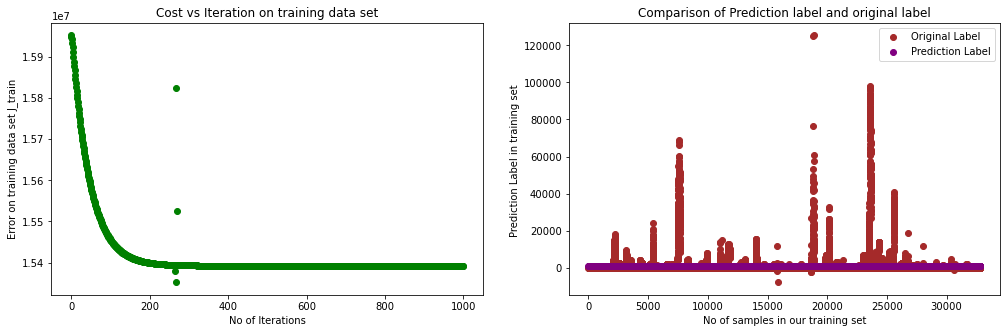

In [44]:
fig,(ax1,ax2)=plt.subplots(figsize=(17,5),
                          nrows=1,
                          ncols=2)
ax1.scatter(x=list(range(0,1000)),y=J_train,color="green")
ax1.set(xlabel="No of Iterations", ylabel = "Error on training data set J_train", title ="Cost vs Iteration on training data set")
ax2.scatter(x=list(range(0,len(x_train.T))),y=y_train.T,color='brown',label='Original Label')
ax2.scatter(x=list(range(0,len(x_train.T))),y=predictions_train.T,color='purple',label='Prediction Label')
ax2.set(xlabel='No of samples in our training set',
       ylabel='Prediction Label in training set ',
       title='Comparison of Prediction label and original label')
ax2.legend();

#### Step 18.2: Results and Data Visualization of validation data set

 A)  Graph of Cost vs Iterations to check the working of our model. 
 
 B)  Scattter plot for our predictions in validation data set  and y_valid.

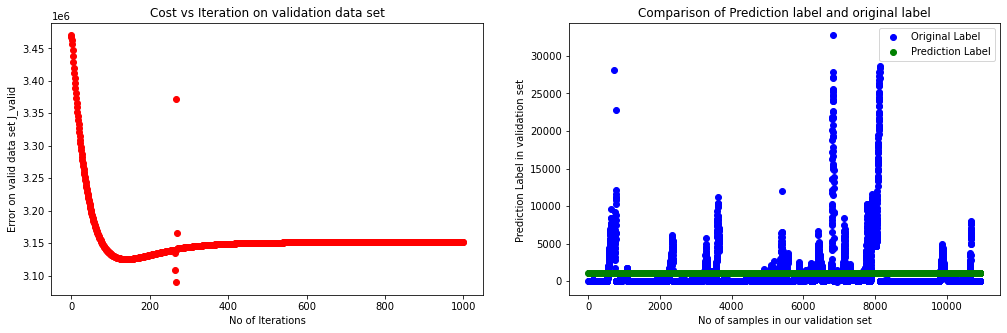

In [45]:
fig,(ax1,ax2)=plt.subplots(figsize=(17,5),
                          nrows=1,
                          ncols=2)
ax1.scatter(x=list(range(0,1000)),y=J_valid,color="red")
ax1.set(xlabel="No of Iterations", ylabel = "Error on valid data set J_valid", title ="Cost vs Iteration on validation data set")
ax2.scatter(x=list(range(0,len(x_valid.T))),y=y_valid.T,color='blue',label='Original Label')
ax2.scatter(x=list(range(0,len(x_valid.T))),y=predictions_valid.T,color='green',label='Prediction Label')
ax2.set(xlabel='No of samples in our validation set',
       ylabel='Prediction Label in validation set ',
       title='Comparison of Prediction label and original label')
ax2.legend();

#### Step 18.3: Results and Data Visualization of test data set

 A)  Graph of Cost vs Iterations to check the working of our model. 
 
 B)  Scattter plot for our predictions in test data set  and y_test.

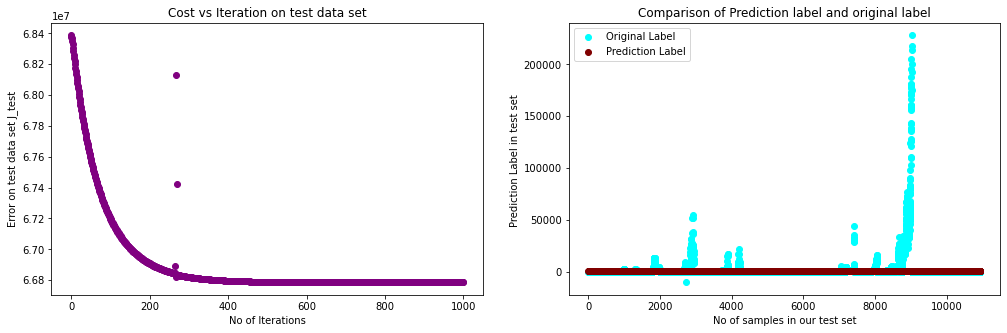

In [46]:
fig,(ax1,ax2)=plt.subplots(figsize=(17,5),
                          nrows=1,
                          ncols=2)
ax1.scatter(x=list(range(0,1000)),y=J_test,color="purple")
ax1.set(xlabel="No of Iterations", ylabel = "Error on test data set J_test", title ="Cost vs Iteration on test data set")
ax2.scatter(x=list(range(0,len(x_test.T))),y=y_test.T,color='cyan',label='Original Label')
ax2.scatter(x=list(range(0,len(x_test.T))),y=predictions_test.T,color='maroon',label='Prediction Label')
ax2.set(xlabel='No of samples in our test set',
       ylabel='Prediction Label in test set ',
       title='Comparison of Prediction label and original label')
ax2.legend();

#### Step 18.4: Error of all data sets

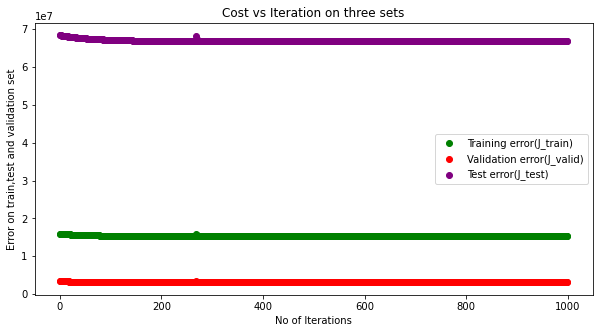

In [47]:
fig,(ax1)=plt.subplots(figsize=(10,5),
                          nrows=1,
                          ncols=1)
ax1.scatter(x=list(range(0,1000)),y=J_train,color='green',label='Training error(J_train)')
ax1.scatter(x=list(range(0,1000)),y=J_valid,color='red',label='Validation error(J_valid)')
ax1.scatter(x=list(range(0,1000)),y=J_test,color="purple",label='Test error(J_test)')
ax1.set(xlabel="No of Iterations", ylabel = "Error on train,test and validation set", title ="Cost vs Iteration on three sets")
ax1.legend();